# Введение

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.\
Нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

###### Описание данных

•	Name — название игры\
•	Platform — платформа\
•	Year_of_Release — год выпуска\
•	Genre — жанр игры\
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)\
•	EU_sales — продажи в Европе (миллионы проданных копий)\
•	JP_sales — продажи в Японии (миллионы проданных копий)\
•	Other_sales — продажи в других странах (миллионы проданных копий)\
•	Critic_Score — оценка критиков (максимум 100)\
•	User_Score — оценка пользователей (максимум 10)\
•	Rating — рейтинг от организации ESRB\
Данные за 2016 год могут быть неполными.


# Анализ и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

import warnings

In [2]:
warnings.filterwarnings("ignore")

## Анализ данных

In [3]:
df=pd.read_csv(r'C:\Users\ilyan\projects\Git\Projects\Games\games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
for i in df.columns.tolist(): 
    display(i, df[i].unique())

'Name'

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'Year_of_Release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'Genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'NA_sales'

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

'EU_sales'

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

'JP_sales'

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

'Other_sales'

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

'Critic_Score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'User_Score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Вывод
Названия столбцов нуэно привести к строчным буквам.\
Примерно половина значений пропущено в Critic_Score, User_Score и Rating. Необходимо учитывать это при работе с данными столбцами.\
Необходимо поменять тип данных на дату для Year_of_Release.

## Предобработка данных

### Приводим столбцы к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()# привели столбцы к нижнему регистру
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Обработка пропусков

Пройдемся по всем столбцам с пропусками 

In [6]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Возможная причина пропусков слишком длинные названия игр: данные не подтянулись из другой базы вместе с оценками и рейтином. Так как для аналитики нам потребуется жанр и рейтинг, то удалим эти 2 строки, у которых этих данных нет.

In [7]:
df = df.dropna(subset=['name']).reset_index(drop= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски могли возникнуть из-за некорректной интеграции с другой базой базой данных.

Строк с пропусками 269 - 1,6% от всех записей - немного, но отсутствие года выпуска не критично для гипотез, которые необходимо проверить, а другие нужные поля заполнены.

Поэтому заполним пропуски нулем, чтобы иметь возможность поменять тип данных столбца year_of_release на целочисленный.

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заменим тип данных в year_of_release на целочисленный

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')

Заполним пропуски в столбцах с оценками на ноль: пропусков слишком много, чтобы удалять строки. А ноль позволит идентифицировать записи, у которых были пропуски.

critic_score приведем к типу 'int', так как в нем только целые числа. 

Посмотрим строки со значением 'tbd'

In [11]:
df['critic_score'] = df['critic_score'].fillna(0).astype('int')
df['user_score'] = df['user_score'].fillna(0)

df[df['user_score'] =='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16695,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16696,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16702,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


'tbd' значит 'to be determined': вероятно, для оценки не набралось значительного количества оценок. Общего признака для этих строк не видно, поэтому заменим 'tbd' на ноль, чтобы заменить тип данных на вещественный.

In [12]:
df['user_score'] = df['user_score'].replace(to_replace='tbd', value=0)
df['user_score'] = df['user_score'].fillna(0).astype('float')

### Cуммарные продажи во всех регионах 

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN,0.01


# Исследовательский анализ данных

## Выбор периода для оценки
Распределение релизов по годам

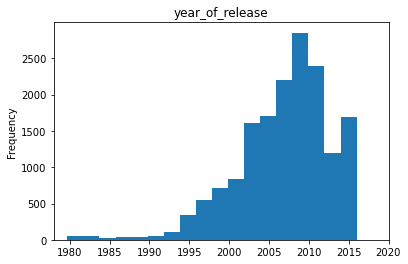

In [14]:
df['year_of_release'].plot(kind='hist', bins = 1000, title='year_of_release', xlim=(1978,2020))
plt.show( )

Пик релизов пришелся на 2008-2010гг: более 2500 в год. Вероятно после 2008г., когда случился экономический кризис, начался процесс консолидации рынка, когда крупные производители стали поглощать мелких. Кроме того, могли ухудшится условия публикаций игр для разработчиков со стороны владельцев платформ и систем дистрибуции (например Steam).
Посмотрим распределение релизов по платформам после 2000г, чтобы оценить средний срок жизни платформы

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

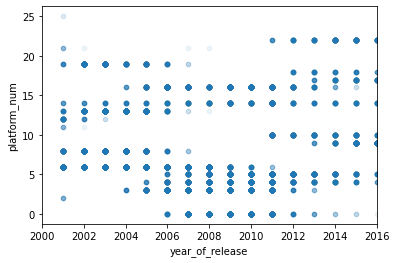

In [15]:
# делаем числовой аналог столбцу platform, чтобы построить диаграмму
df ['platform_num'] = df ['platform']
list_platform = []
for i in range(len(df ['platform'].unique())):
    list_platform.append(i) 
df ['platform_num'] = df ['platform_num'].replace(df['platform'].unique(), list_platform)
df[df['year_of_release'] > 2000].plot(kind='scatter', x = 'year_of_release', y = 'platform_num', xlim=(2000, 2016), alpha = 0.08)
display(df['platform'].unique())
plt.show( )

Средний срок жизни платформы после 2000-х 7-8 лет.

Как видно на графике с 2014 года начался активный жизненный цикл платформ PSV, XOne, PS4, а для X360, PSP количество релизов с этого года стало гораздо меньше. Таким  образом, для прогнозирования продаж логично рассматривать период с 2014 года, когда релизы для старых платформ уже незначительны, а для новых платформ количество релизов игр уже набрало значительное число.
Посмотрим продажи по платформам

In [16]:
since_2014 =  df[df['year_of_release'] >= 2014]
display (
    since_2014.pivot_table(index ='platform', columns=['year_of_release'],  values = 'total_sales', aggfunc='sum' )
    .sort_values(by = 2016, ascending=False)
    )

year_of_release,2014,2015,2016
platform,,,
PS4,84.22,100.44,59.01
XOne,49.26,54.67,23.91
3DS,41.75,26.75,14.50
PC,12.38,7.93,4.89
WiiU,20.35,15.22,4.25
PSV,10.56,5.93,4.10
PS3,40.88,14.70,3.23
X360,31.61,10.86,1.40
Wii,3.45,1.05,0.17


Платформы с наибольшим количеством продаж: PS4, XOne, 3DS, PC. Так как данные за 2016 г. неполные, оценим динамику за 2014-2015гг. Рост только у PS4, XOne.

Построим диаграммы размаха по платформам.

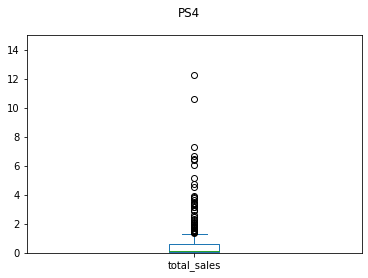

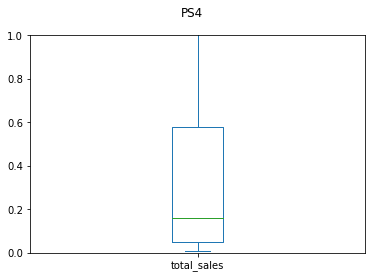

0.16

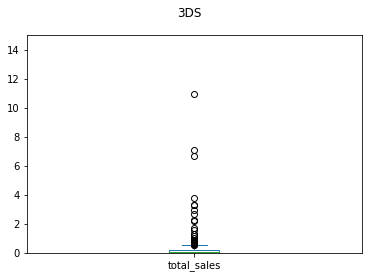

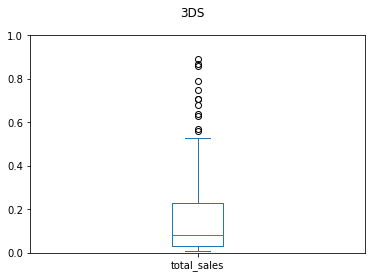

0.08

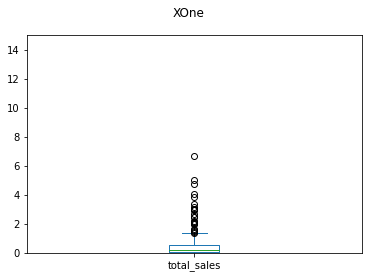

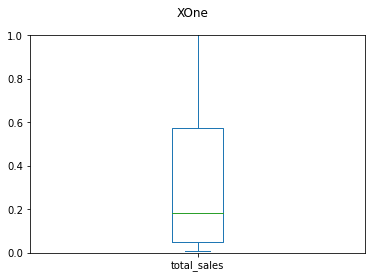

0.185

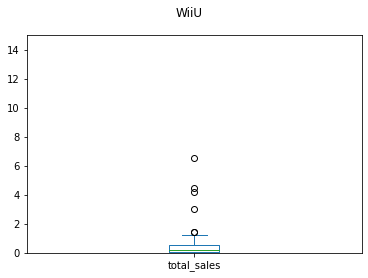

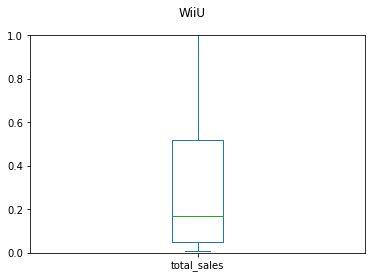

0.16999999999999998

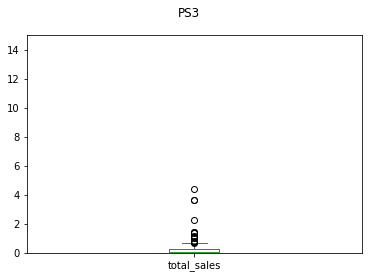

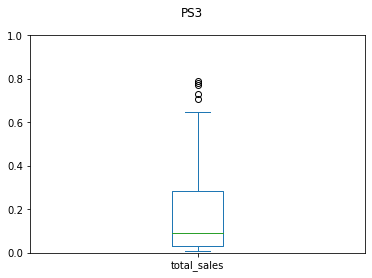

0.09000000000000001

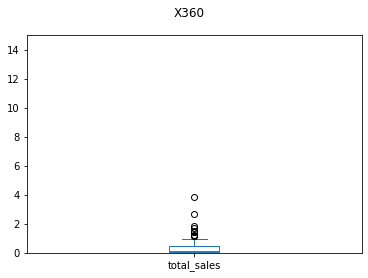

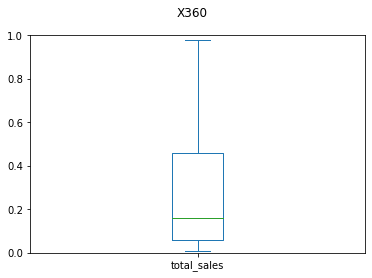

0.16

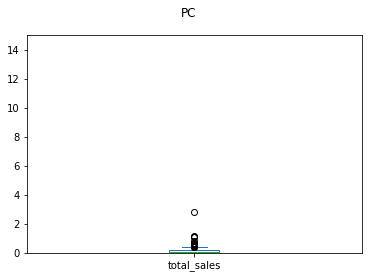

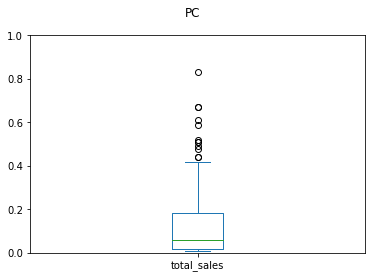

0.06

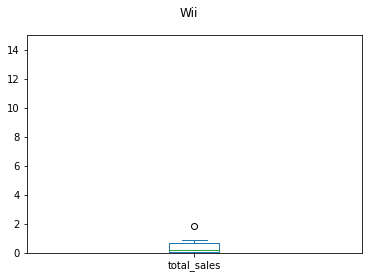

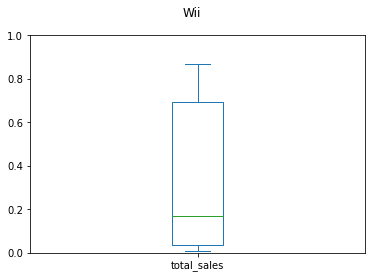

0.16999999999999998

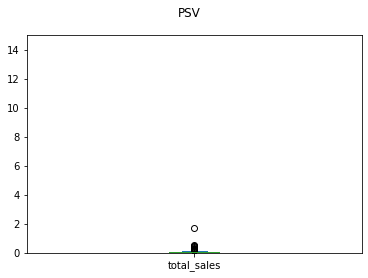

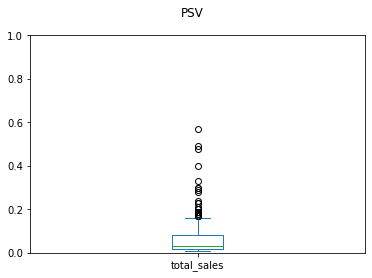

0.03

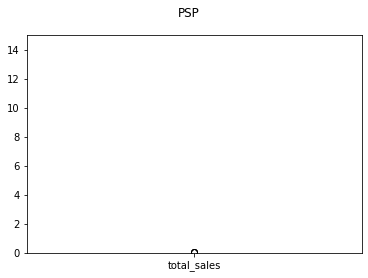

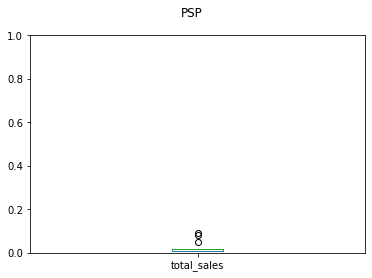

0.02

In [17]:
platforms = since_2014['platform'].unique()
for platform in platforms:
    since_2014.query('platform == @platform').plot(kind = 'box', y='total_sales')
    plt.suptitle(platform)
    plt.ylim(0,15) # смотрим на мелком масштабе, чтобы видеть выбросы
    since_2014.query('platform == @platform').plot(kind = 'box', y='total_sales')
    plt.suptitle(platform)
    plt.ylim(0,1) # смотрим на крупном масштабе, чтобы видеть медиану и границы квартилей
    plt.show( )
    display (since_2014[since_2014['platform']== platform] ['total_sales'].median())

За период с 2014 года наибольший потенциал игр был у PS4, XOne, WiiU и Wii: 3-й квартиль начинается примерно от 600 тыс. проданных копий. При этом у PS4 есть хиты, которые продавались тиражами более 10 млн копий, а у XOne и WiiU максимум - 7 млн копий, зато медианы у XOne и Wii, WiiU больше, чем у PS4. Правда у Wii продажи в 2016 близки к 0 - ее успехи в прошлом, поэтому из списка платформ, на которые будем делать ставку на 2017 год ее вычеркнем.

In [18]:
since_2014.pivot_table(index='platform', values ='total_sales', aggfunc='median' )

,total_sales
platform,
3DS,0.080
PC,0.060
PS3,0.090
PS4,0.160
PSP,0.020
PSV,0.030
Wii,0.170
WiiU,0.170
X360,0.160


## Связь между отзывами и продажами

Посмотрим связь между оценками и продажами для PS4.

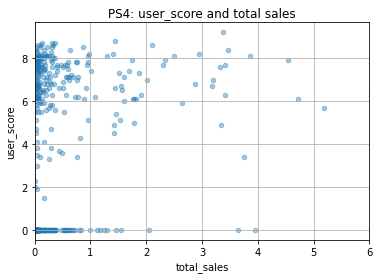

In [19]:
since_2014_PS4 = since_2014[since_2014['platform'] == 'PS4']
since_2014_PS4.plot(kind='scatter', x='total_sales', y='user_score',  grid=True, alpha = 0.4, title = 'PS4: user_score and total sales')
plt.xlim(0, 6)
plt.show( )

Видно, что среди игр с высокими оценками больше, тех, которые продаются лучше.
Построим диаграмму без игр, у которых нет оценок

'Связь между оценками критиков и игроков 0.5464342451190309'

'Связь между оценками игроков и продажами -0.03936434521328735'

'Связь между оценками критиков и продажами 0.40212034776354333'

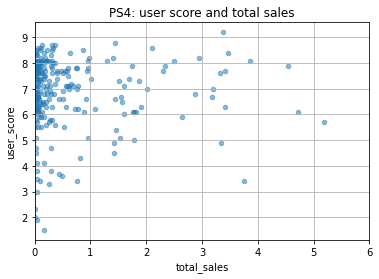

In [20]:
# убираем игры, у которых нет оценок игроков - для расчета корреляции оценок игроков и объема продаж
user_scored_PS4 = since_2014_PS4[since_2014_PS4['user_score'] >0]
# убираем игры, у которых нет оценок критиков - для расчета корреляции оценок критиков и объема продаж
critic_scored_PS4 = since_2014_PS4[since_2014_PS4['critic_score'] >0]
# убираем игры, у которых нет хотя бы одной оценки - для расчета корреляции оценок игроков и критиков
all_scored_PS4 =user_scored_PS4[user_scored_PS4['critic_score'] >0] 

display(f"Связь между оценками критиков и игроков {all_scored_PS4['critic_score'].corr(all_scored_PS4['user_score'])}")
display(f"Связь между оценками игроков и продажами {user_scored_PS4['total_sales'].corr(user_scored_PS4['user_score'])}")
display(f"Связь между оценками критиков и продажами {critic_scored_PS4['total_sales'].corr(critic_scored_PS4['critic_score'])}")
user_scored_PS4.plot(kind='scatter', x='total_sales', y='user_score',  grid=True, alpha = 0.5, title = 'PS4: user score and total sales')
plt.xlim(0, 6)
plt.show( )

Зависимость между оценками и продажами не однозначная: одному уровню оценок соответсвуют разные уровни продаж. При этом количество игр для каждого уровня оценок разное, что влияет на восприятие количества игр с высокими продажами. Например, если всего игр с оценками меньше "6" мало, то будет и мало игр с большим объемом продаж для такого уровня оценок.
Нужно нормировать результаты: посчитаем, как меняется доля игр с высокими продажами в зависимости от оценок. Оценки разделим на категории. Высокие продажи примем за планку - 1 млн проданных копий.

In [21]:
def user_score_category (row):
    """
    делит игры на категории в зависимости от оценок пользователей
    """
    if row['user_score'] > 8:
        return 8
    if row['user_score'] > 6:
        return 6  
    if row['user_score'] > 4:
        return 4
    if row['user_score'] > 2:
        return 2 
    else:
        return 0

user_scored = since_2014[since_2014['user_score'] >0]
user_scored['user_score_category'] = user_scored.apply(user_score_category, axis=1)

high_sells = '>1'

def high_sells (row):
    """
    присваивает True для игр с продажами свыше 0.5 млн копий
    """
    if row['total_sales'] > 0.5:
        return True
    else:
        return False
user_scored['high_sells'] = user_scored.apply(high_sells, axis=1)
user_scored

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_num,user_score_category,high_sells
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,10.65,9,8,True
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,7.30,9,4,True
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,6.43,9,4,True
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,6.49,9,4,True
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,6.04,9,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01,17,8,False
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01,17,6,False
16650,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01,18,8,False
16658,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,NaN,0.01,17,6,False


Считаем долю игр с продажами свыше 0.5 млн копий по категориям оценок

In [22]:
user_scored.pivot_table(index = 'platform', values = 'high_sells')

,high_sells
platform,
3DS,0.218182
PC,0.081967
PS3,0.285714
PS4,0.334711
PSV,0.013699
Wii,1.000000
WiiU,0.333333
X360,0.265060
XOne,0.345455


Видим, что доля больших продаж, не зависит от оценок.

##	Соотнесите выводы с продажами игр на других платформах.

Посмотрим связь между оценками и продажами для других платформ.

In [23]:
user_scored.pivot_table(index = 'user_score_category', columns = 'platform', values = 'high_sells')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
user_score_category,,,,,,,,,
0,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
2,0.000000,0.166667,0.428571,0.181818,0.000000,NaN,0.000000,0.363636,0.166667
4,0.166667,0.088235,0.280000,0.416667,0.000000,1.0,0.000000,0.266667,0.395349
6,0.178571,0.066667,0.295455,0.331126,0.000000,NaN,0.230769,0.228571,0.372340
8,0.333333,0.071429,0.166667,0.341463,0.037037,1.0,0.714286,0.400000,0.190476


Связи между высокими оценками и высокой долей игр с большими продажами не прослеживается.
Построим графики для всех платформ.

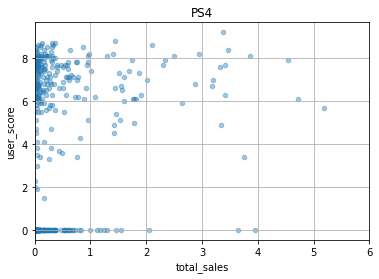

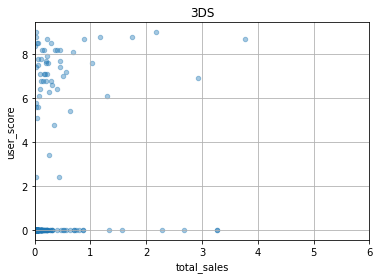

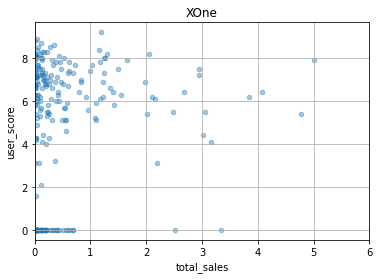

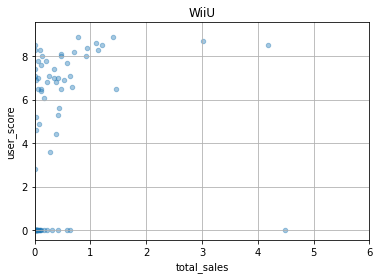

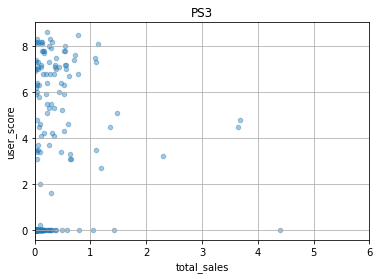

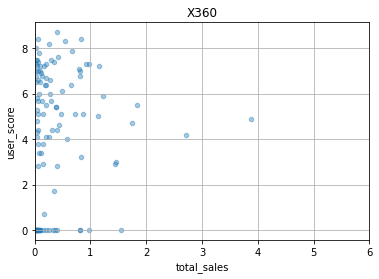

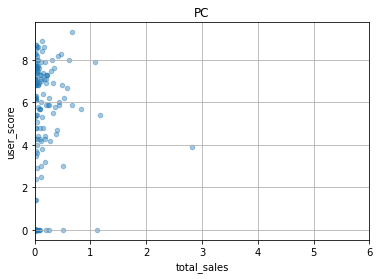

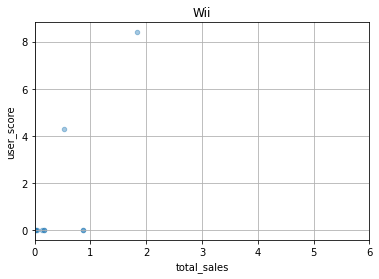

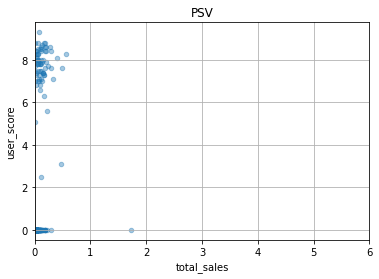

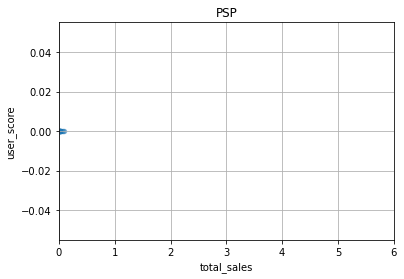

In [24]:
for platform in platforms:
    since_2014[since_2014['platform'] == platform].plot(kind='scatter', x='total_sales', y='user_score',  grid=True, alpha = 0.4, title = platform)
    plt.xlim(0, 6)
    plt.show( )

На примере XOne, PS3 X360 видно, что успешные игры могут иметь средние рейтинги. Поэтому говорить об устойчивой связи между оценками игроков и продажами нельзя.

## Распределение игр по жанрам

In [25]:
genre = since_2014.pivot_table(index='genre', values = 'total_sales', aggfunc=('sum', 'count'))
genre['sales_per_game'] = genre['sum'] / genre['count']
genre.sort_values(by='sales_per_game', ascending = False)

,count,sum,sales_per_game
genre,,,
Shooter,128,149.41,1.167266
Sports,161,95.12,0.590807
Platform,38,16.28,0.428421
Fighting,60,25.49,0.424833
Role-Playing,221,92.80,0.419910
Racing,69,24.63,0.356957
Misc,113,33.52,0.296637
Action,619,176.79,0.285606
Simulation,44,12.24,0.278182


Самые продающиеся игры в жанре Shooter. С большим отрывом идут Sports и прочие.

# Портрет пользователя каждого региона

## Самые популярные платформы 

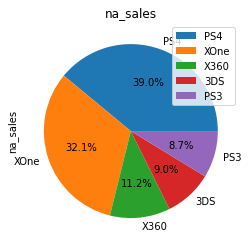

,na_sales,share
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624
WiiU,19.36,0.068155
PC,7.23,0.025452
PSV,2.52,0.008871
Wii,2.08,0.007322


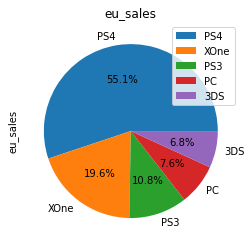

,eu_sales,share
platform,,
PS4,130.04,0.480420
XOne,46.25,0.170866
PS3,25.54,0.094355
PC,17.97,0.066388
3DS,16.12,0.059554
X360,15.49,0.057226
WiiU,13.15,0.048581
PSV,3.53,0.013041
Wii,2.59,0.009568


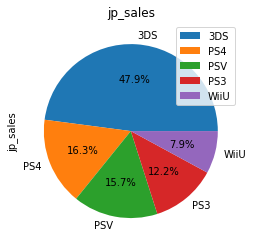

,jp_sales,share
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526
PSP,0.36,0.003867
XOne,0.32,0.003438
X360,0.08,0.000859
PC,0.00,0.000000


In [26]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    rating_platform = since_2014.pivot_table(index='platform', values = region, aggfunc='sum' ).sort_values(by = region, ascending = False)
    rating_platform ['share'] = rating_platform [region] / rating_platform [region].sum()
    rating_platform[:5].plot(kind='pie', y=region, autopct='%.1f%%',  title = region)
    plt.show()
    display (rating_platform) 

На рынке Северной Америки доля приставок от Майкрософт: XOne и X360 выше, чем в других регионах. В Европе почти половину рынка занимает PS4 и PC входит в топ-5. Япония - рынок портативных консолей: 4 из 5 позиций. Майкрософт со своими XOne и X360 значительно проигрывает Sony.

## Самые популярные жанры 

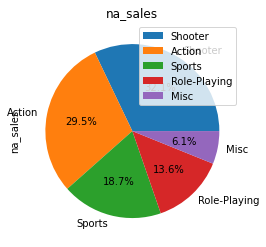

,na_sales,share
genre,,
Shooter,79.02,0.278181
Action,72.53,0.255333
Sports,46.13,0.162395
Role-Playing,33.47,0.117827
Misc,15.05,0.052982
Fighting,12.43,0.043758
Racing,8.74,0.030768
Platform,6.79,0.023903
Adventure,5.64,0.019855


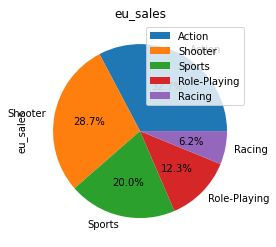

,eu_sales,share
genre,,
Action,74.68,0.275898
Shooter,65.52,0.242057
Sports,45.73,0.168945
Role-Playing,28.17,0.104071
Racing,14.13,0.052202
Misc,12.86,0.047510
Simulation,7.30,0.026969
Platform,6.80,0.025122
Fighting,6.69,0.024716


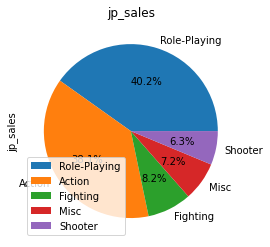

,jp_sales,share
genre,,
Role-Playing,31.16,0.334730
Action,29.58,0.317757
Fighting,6.37,0.068428
Misc,5.61,0.060264
Shooter,4.87,0.052315
Adventure,3.60,0.038672
Sports,3.26,0.035020
Platform,2.69,0.028897
Simulation,2.31,0.024815


In [27]:
for region in regions:
    rating_platform = since_2014.pivot_table(index='genre', values = region, aggfunc='sum' ).sort_values(by = region, ascending = False)
    rating_platform ['share'] = rating_platform [region] / rating_platform [region].sum()
    rating_platform[:5].plot(kind='pie', y=region, autopct='%.1f%%',  title = region)
    plt.show()
    display (rating_platform) 

Рынки С. Америки и Европы похожи: Action и Shooter занимают половину рынка. В Японии Role-Playing и Action занимают 64% рынка.

## Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [28]:
since_2014['rating'].unique()# вспомним, что у нас в этом столбце

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [29]:
with_rating=since_2014.dropna(subset=['rating'])#удалим строки с пропусками, чтобы делать выводы по заполненным данным

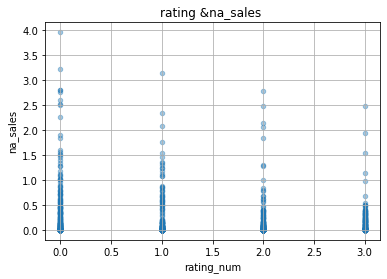

,na_sales
rating_num,
0,0.363849
1,0.231689
2,0.143727
3,0.179622


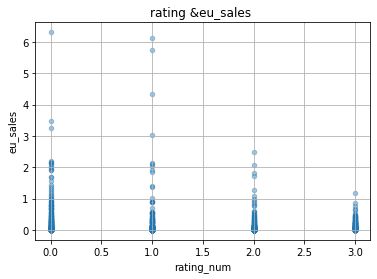

,eu_sales
rating_num,
0,0.352604
1,0.265114
2,0.125720
3,0.141405


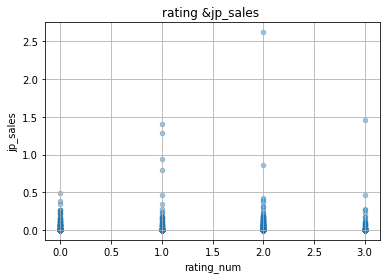

,jp_sales
rating_num,
0,0.030226
1,0.040822
2,0.054539
3,0.024108


In [30]:
# делаем числовой аналог столбцу rating, чтобы построить диаграмму
with_rating['rating_num'] = with_rating['rating']
list_rating = []
for i in range(len(with_rating['rating'].unique())):
    list_rating.append(i) 
with_rating['rating_num'] = with_rating['rating_num'].replace(with_rating['rating'].unique(), list_rating)
for region in regions:
    with_rating.plot(kind='scatter', x='rating_num', y=region,  grid=True, alpha = 0.4, title = f'rating &{region} ')
    plt.show( )
    display (with_rating.pivot_table(index = 'rating_num', values =region, aggfunc ='mean'))

Кажется, что  в С.Америке и Европе лучше продаются игры с маркировкой М. В Японии продажи для всех рейтингов примерно одинаковые.

# Гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей. Пусть Гипотеза Н0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Н1: средние пользовательские рейтинги платформ Xbox One и PC различаются. Уровень значимости выберем - 5%.

Предполагаем, что оценки пользователей разных платформ независимые, т.е. одни теж же люди не оценивают одну и ту же игру на разных платформах. Посчитаем дисперсии для выборок, чтобы определить значение equal_var при t-тесте

In [31]:
user_scored_XOne = since_2014[(since_2014['user_score'] >0) & (since_2014['platform'] == 'XOne')]
user_scored_PC = since_2014[(since_2014['user_score'] >0) & (since_2014['platform'] == 'PC')]

display(np.var(user_scored_XOne['user_score']), np.var(user_scored_PC['user_score']))

1.87954600550964

2.877374361730719

Дисперсии отличаются, поэтому equal_var = False

In [32]:
result = st.ttest_ind (user_scored_XOne['user_score'], user_scored_PC['user_score'],equal_var = False)
display(f"p-значение {result.pvalue}")

'p-значение 0.11601398086668832'

Вероятность того, что средние рейтинги платформ Xbox One и PC такие, как мы получили в выборках, и при этом средние оценки генеральных совокупностей Xbox One и PC одинаковы - 11,6%, что больше 5%, поэтому нулевая гипотеза не может быть отвергнута: средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми.

## Cредние пользовательские рейтинги жанров Action и Sports разные

Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей: оценок для игр жанра Action и для игр жанра Sports. Пусть Гипотеза Н0: cредние пользовательские рейтинги жанров Action и Sports одинаковые. Н1: cредние пользовательские рейтинги жанров Action и Sports различаются. Уровень значимости выберем - 5%.
Предполагаем, что оценки пользователей разных жанров независимые, т.е. оценки одного жанра не зависят от оценок другого. 

In [33]:
user_scored_action = since_2014[(since_2014['user_score'] >0) & (since_2014['genre'] == 'Action')]
user_scored_sports = since_2014[(since_2014['user_score'] >0) & (since_2014['genre'] == 'Sports')]
display(np.var(user_scored_action['user_score']), np.var(user_scored_sports['user_score']))

1.8920844811753907

3.419837559675118

Дисперсии отличаются, поэтому equal_var = False

In [34]:
result = st.ttest_ind (user_scored_action['user_score'], user_scored_sports['user_score'],equal_var = False)
display(f"p-значение {result.pvalue}")

'p-значение 1.1825550382644557e-14'

Вероятность того, что средние оценки игр жанров Action и Sports такие, как мы получили в выборках, и при этом средние оценки генеральных совокупностей Action и Sports одинаковые - 1,18*10 в степени -14, т.е. 0., что меньше 5%, поэтому нулевая гипотеза отвергается.
Т.е. суждение "Cредние пользовательские рейтинги жанров Action и Sports разные" считаем истиным.

# Вывод

- Мы подготовили данные для анализа: избавились от пропусков в столбцах Year_of_Release и с оценками игр; добавили столбец с общими продажами по регионам.

- С 2014 года начался активный жизненный цикл платформ PSV, XOne, PS4, а для X360, PSP количество релизов с этого года стало гораздо меньше. Таким образом, для прогнозирования продаж нужно рассматривать период с 2014 года, когда релизы для старых платформ уже незначительны, а для новых платформ количество релизов игр стало значительным.

- Платформы с наибольшим количеством продаж: PS4, XOne, 3DS, PC. Так как данные за 2016 г. неполные, оценили динамику за 2014-2015гг. Рост только у PS4, XOne.

- За период с 2014 года наибольший потенциал платформ с точки зрения продаж игр (размах показателя проданных копий) был у PS4, XOne, WiiU и Wii: 3-й квартиль начинается примерно от 600 тыс. проданных копий. При этом у PS4 есть хиты, которые продавались тиражами более 10 млн копий, а у XOne и WiiU максимум - 7 млн копий, зато медианы у XOne и Wii, WiiU больше, чем у PS4. Но у Wii продажи в 2016 близки к 0 - ее успехи в прошлом, поэтому из списка платформ, на которые будем делать ставку на 2017 год ее вычеркнем.

- Таким образом, платформы с наибольшим количеством продаж и наибольшим размахом, на которые нужно делать упор в продажах: PS4, XOne, 3DS, PС, WiiU.
Средний период жизни платформы 7-8 лет. Исходя из этого период продаж игр для платформы 3DS еще 1-2 года. Остальные платформы пока не достигли стадии спада.

- При планировании успешности продаж не стоит полагаться на оценки игроков.

- Самые продающиеся жанры в С. Америке и Европе Action, Shooting, Sports; для Японии - Role-Playing, Action, Fighting.

- В С.Америке и Европе лучше продаются игры с маркировкой "М". В Японии продажи для всех рейтингов примерно одинаковые.

- Средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми. 
- Cредние пользовательские рейтинги жанров Action и Sports разные.